#Importación de los datos

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ruta = '/content/drive/MyDrive/Archivos csv ciencia de datos/TelecomX_Data.json'

In [4]:
df = pd.read_json(ruta)

In [5]:
df.sample(5)

,customerID,Churn,customer,phone,internet,account
4848,6633-MPWBS,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6371,8752-IMQOS,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
4018,5498-IBWPI,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
3813,5219-YIPTK,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1202,1722-LDZJS,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [6]:
from pandas import json_normalize

##Normalización de tablas y datos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [8]:
df.set_index('customerID', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Churn     7267 non-null   object
 1   customer  7267 non-null   object
 2   phone     7267 non-null   object
 3   internet  7267 non-null   object
 4   account   7267 non-null   object
dtypes: object(5)
memory usage: 340.6+ KB


##Extracción de datos de los diccionarios.


Diccionario Customer

In [10]:
df['customer'][0]

/tmp/ipython-input-1121132801.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['customer'][0]


{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

Diccionario account

In [11]:
s_account = df['account'].apply(pd.Series)
s_account

,Contract,PaperlessBilling,PaymentMethod,Charges
customerID,,,,
0002-ORFBO,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
0003-MKNFE,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
0004-TLHLJ,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
0011-IGKFF,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
0013-EXCHZ,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...,...,...,...
9987-LUTYD,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}"
9992-RRAMN,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}"
9992-UJOEL,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}"


In [12]:
serie_charges2 = s_account['Charges'].apply(pd.Series)
serie_charges2

,Monthly,Total
customerID,,
0002-ORFBO,65.60,593.3
0003-MKNFE,59.90,542.4
0004-TLHLJ,73.90,280.85
0011-IGKFF,98.00,1237.85
0013-EXCHZ,83.90,267.4
...,...,...
9987-LUTYD,55.15,742.9
9992-RRAMN,85.10,1873.7
9992-UJOEL,50.30,92.75


Datos del cliente.

In [13]:
df['gender'] = df['customer'].apply(lambda x: x.get('gender') if isinstance(x, dict) else None)

In [14]:
df['SeniorCitizen'] = df['customer'].apply(lambda x: x.get('SeniorCitizen') if isinstance(x, dict) else None)

In [15]:
df['Partner'] = df['customer'].apply(lambda x: x.get('Partner') if isinstance(x, dict) else None)

In [16]:
df['tenure'] = df['customer'].apply(lambda x: x.get('tenure') if isinstance(x, dict) else None)

In [17]:
df['Dependents'] = df['customer'].apply(lambda x: x.get('Dependents') if isinstance(x, dict) else None)

Extracción de datos de cuenta.

In [18]:
df['account'][0]

/tmp/ipython-input-3396431051.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['account'][0]


{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [19]:
charges_dict = s_account['Charges'].apply(pd.Series)

In [20]:
df['contract'] = df['account'].apply(lambda x: x.get('Contract') if isinstance(x, dict) else None)

In [21]:
df['PaperlessBilling'] = df['account'].apply(lambda x: x.get('PaperlessBilling') if isinstance(x, dict) else None)

In [22]:
df['PaymentMethod'] = df['account'].apply(lambda x: x.get('PaymentMethod') if isinstance(x, dict) else None)

aplicacion de metodo series a columnas mes y total

In [23]:
charges_dict = s_account['Charges'].apply(pd.Series)

In [24]:
charges_dict['Monthly'] = pd.to_numeric(charges_dict['Monthly'], errors='coerce')
charges_dict['Total'] = pd.to_numeric(charges_dict['Total'], errors='coerce')

In [25]:
df =  pd.concat([df, charges_dict], axis=1)
df

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,contract,PaperlessBilling,PaymentMethod,Monthly,Total
customerID,,,,,,,,,,,,,,,
0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,9,Yes,One year,Yes,Mailed check,65.60,593.30
0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,9,No,Month-to-month,No,Mailed check,59.90,542.40
0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,4,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,13,No,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,3,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,13,No,One year,No,Mailed check,55.15,742.90
9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,22,No,Month-to-month,Yes,Electronic check,85.10,1873.70
9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,2,No,Month-to-month,Yes,Mailed check,50.30,92.75


Datos de internet

In [26]:
df

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,contract,PaperlessBilling,PaymentMethod,Monthly,Total
customerID,,,,,,,,,,,,,,,
0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,9,Yes,One year,Yes,Mailed check,65.60,593.30
0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,9,No,Month-to-month,No,Mailed check,59.90,542.40
0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,4,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,13,No,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,3,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,13,No,One year,No,Mailed check,55.15,742.90
9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,22,No,Month-to-month,Yes,Electronic check,85.10,1873.70
9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,2,No,Month-to-month,Yes,Mailed check,50.30,92.75


In [27]:
s_internet = df['internet'].apply(pd.Series)
s_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
0002-ORFBO,DSL,No,Yes,No,Yes,Yes,No
0003-MKNFE,DSL,No,No,No,No,No,Yes
0004-TLHLJ,Fiber optic,No,No,Yes,No,No,No
0011-IGKFF,Fiber optic,No,Yes,Yes,No,Yes,Yes
0013-EXCHZ,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
9987-LUTYD,DSL,Yes,No,No,Yes,No,No
9992-RRAMN,Fiber optic,No,No,No,No,No,Yes
9992-UJOEL,DSL,No,Yes,No,No,No,No


In [28]:
df['InternetService'] = df['internet'].apply(lambda x: x.get('InternetService') if isinstance(x, dict) else None)

In [29]:
df['OnlineSecurity'] = df['internet'].apply(lambda x: x.get('OnlineSecurity') if isinstance(x, dict) else None)

In [30]:
df['OnlineBackup'] = df['internet'].apply(lambda x: x.get('OnlineBackup') if isinstance(x, dict) else None)


In [31]:
df['DeviceProtection'] = df['internet'].apply(lambda x: x.get('DeviceProtection') if isinstance(x, dict) else None)

In [32]:
df['TechSupport'] = df['internet'].apply(lambda x: x.get('TechSupport') if isinstance(x, dict) else None)

In [33]:
df['StreamingTV'] = df['internet'].apply(lambda x: x.get('StreamingTV') if isinstance(x, dict) else None)

In [34]:
df['StreamingMovies'] = df['internet'].apply(lambda x: x.get('StreamingMovies') if isinstance(x, dict) else None)

##Tranformación de datos.

Convertir ternure a int (entero)

In [35]:
df['tenure'] = df['tenure'].astype(np.int64)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   customer          7267 non-null   object 
 2   phone             7267 non-null   object 
 3   internet          7267 non-null   object 
 4   account           7267 non-null   object 
 5   gender            7267 non-null   object 
 6   SeniorCitizen     7267 non-null   int64  
 7   Partner           7267 non-null   object 
 8   tenure            7267 non-null   int64  
 9   Dependents        7267 non-null   object 
 10  contract          7267 non-null   object 
 11  PaperlessBilling  7267 non-null   object 
 12  PaymentMethod     7267 non-null   object 
 13  Monthly           7267 non-null   float64
 14  Total             7256 non-null   float64
 15  InternetService   7267 non-null   object 
 16  OnlineSecurity    7267 non-null 

Columna cuentas diarias.

In [37]:
###Creación de la columna
df['cuentas_diarias'] = df['Monthly'] / 30

In [38]:
df.head(5)

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,9,Yes,...,65.6,593.30,DSL,No,Yes,No,Yes,Yes,No,2.186667
0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,9,No,...,59.9,542.40,DSL,No,No,No,No,No,Yes,1.996667
0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,4,No,...,73.9,280.85,Fiber optic,No,No,Yes,No,No,No,2.463333
0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,13,No,...,98.0,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.266667
0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,3,No,...,83.9,267.40,Fiber optic,No,No,No,Yes,Yes,No,2.796667


Para un mejor analisis los valores 'yes ' y 'no' se cambiarán por valores boleanos.

In [39]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [40]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [41]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [42]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [43]:
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})

In [44]:
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})

In [45]:
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})

In [46]:
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})

In [47]:
df['StreamingMovies'  ] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})

##Carga y analisis de la información

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   customer          7267 non-null   object 
 2   phone             7267 non-null   object 
 3   internet          7267 non-null   object 
 4   account           7267 non-null   object 
 5   gender            7267 non-null   object 
 6   SeniorCitizen     7267 non-null   int64  
 7   Partner           7267 non-null   int64  
 8   tenure            7267 non-null   int64  
 9   Dependents        7267 non-null   int64  
 10  contract          7267 non-null   object 
 11  PaperlessBilling  7267 non-null   int64  
 12  PaymentMethod     7267 non-null   object 
 13  Monthly           7267 non-null   float64
 14  Total             7256 non-null   float64
 15  InternetService   7267 non-null   object 
 16  OnlineSecurity    7267 non-null 

In [49]:
df.describe()

,Churn,SeniorCitizen,Partner,tenure,Dependents,PaperlessBilling,Monthly,Total,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000
mean,0.265370,0.162653,0.484106,32.346498,0.300124,0.593230,64.720098,2280.634213,0.440380,0.438094,0.370032,0.490679,0.495251,2.157337
std,0.441561,0.369074,0.499782,24.571773,0.458343,0.491265,30.129572,2268.632997,0.496476,0.496196,0.482855,0.499957,0.500021,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,35.425000,400.225000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,0.000000,1.000000,70.300000,1391.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.343333
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,1.000000,1.000000,1.000000,1.000000,1.000000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


In [50]:
df.head(1)

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,...,65.6,593.3,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667


Se utiliza una version reducida del df para poder tener una mejor visualizacion de los datos.


In [51]:
datos_reducidos = df[['Churn','Monthly','Total','cuentas_diarias','contract','PaymentMethod','gender','SeniorCitizen','InternetService']]
datos_reducidos

,Churn,Monthly,Total,cuentas_diarias,contract,PaymentMethod,gender,SeniorCitizen,InternetService
customerID,,,,,,,,,
0002-ORFBO,0.0,65.60,593.30,2.186667,One year,Mailed check,Female,0,DSL
0003-MKNFE,0.0,59.90,542.40,1.996667,Month-to-month,Mailed check,Male,0,DSL
0004-TLHLJ,1.0,73.90,280.85,2.463333,Month-to-month,Electronic check,Male,0,Fiber optic
0011-IGKFF,1.0,98.00,1237.85,3.266667,Month-to-month,Electronic check,Male,1,Fiber optic
0013-EXCHZ,1.0,83.90,267.40,2.796667,Month-to-month,Mailed check,Female,1,Fiber optic
...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0.0,55.15,742.90,1.838333,One year,Mailed check,Female,0,DSL
9992-RRAMN,1.0,85.10,1873.70,2.836667,Month-to-month,Electronic check,Male,0,Fiber optic
9992-UJOEL,0.0,50.30,92.75,1.676667,Month-to-month,Mailed check,Male,0,DSL


##Informe


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

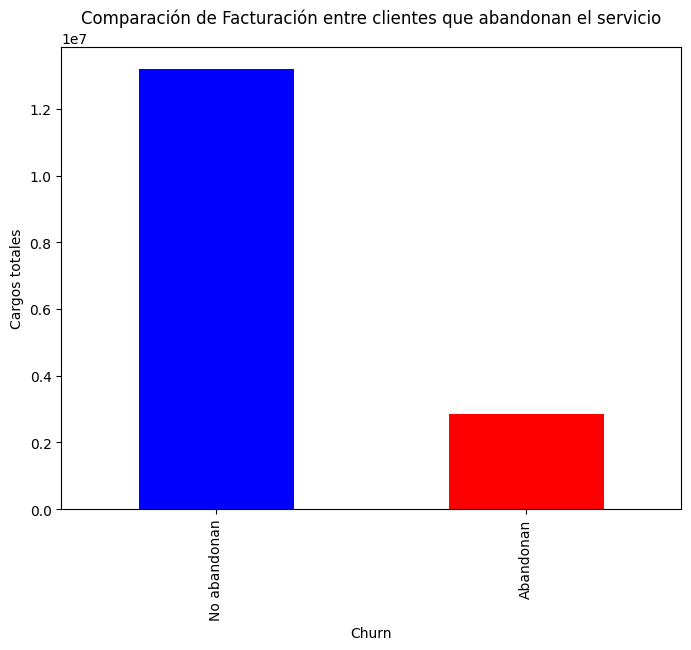

In [53]:
#Agrupación por Churn y por facturación mensual:
resumen = df.groupby('Churn')['Total'].sum()

#Grafico de barras:
plt.figure(figsize=(8, 6))
resumen.plot(kind='bar', color=['blue', 'red'])
plt.xticks([0, 1], ['No abandonan', 'Abandonan'])
plt.ylabel('Cargos totales')
plt.title('Comparación de Facturación entre clientes que abandonan el servicio')
plt.show()

Text(0, 0.5, 'Cargos totales')

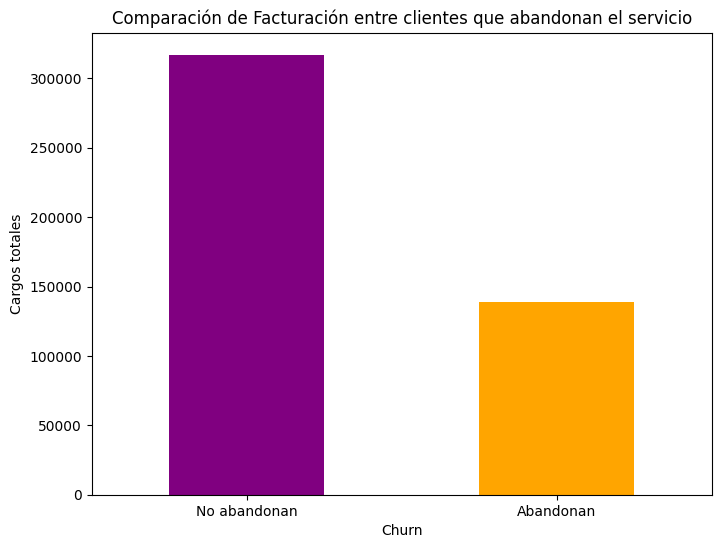

In [54]:
import matplotlib.pyplot as plt

#suma de facturación mensual
resumen = df.groupby('Churn')['Monthly'].sum()


plt.figure(figsize=(8, 6))
resumen.plot(kind='bar', color=['purple', 'orange'])
plt.xticks([0, 1], ['No abandonan', 'Abandonan'], rotation=0)
plt.ylabel('Cargos mensuales')
plt.title('Comparación de Facturación entre clientes que abandonan el servicio')
plt.ylabel('Cargos totales')

###Utilizar la moda para ver la proporción de clientes que abandonan

In [55]:
datos_reducidos['Churn'].mode()

,Churn
0,0.0


In [56]:
datos_reducidos['Churn'].value_counts().unique()

array([5174, 1869])

##Aproximandamente un 27% de los clientes dejan la compañia/servicio


In [57]:
#conteo de ocurrencias y conversion a %
porcentaje_churn = df['Churn'].value_counts(normalize=True).round(2) * 100
porcentaje_churn.rename(index = {0: 'No abandonan', 1: 'Abandonan'}, inplace=True)
print(porcentaje_churn)

Churn
No abandonan    73.0
Abandonan       27.0
Name: proportion, dtype: float64


In [58]:
#Probabiñodad de churn segun tipo de contrato
p_churn = df.groupby('contract')['Churn'].mean() * 100
print(p_churn)

contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


In [59]:
# Churn por género
prob_churn_gender = df.groupby('gender')['Churn'].mean() * 100

# Churn por tipo de contrato
prob_churn_contract = df.groupby('contract')['Churn'].mean() * 100

# Churn por método de pago
prob_churn_payment = df.groupby('PaymentMethod')['Churn'].mean() * 100

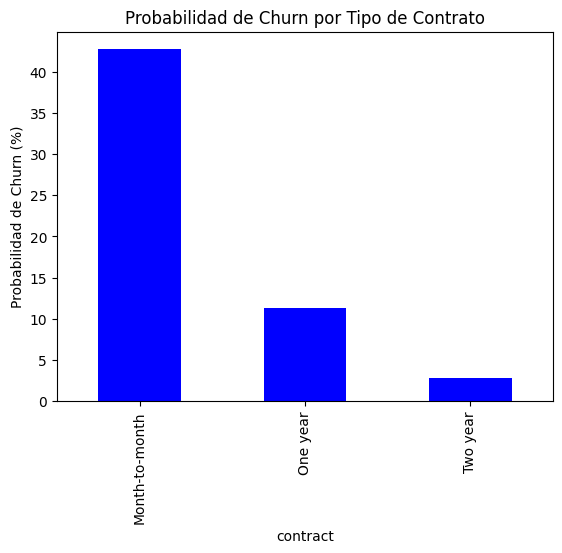

In [60]:
p_churn.plot(kind='bar', color=['blue'])
plt.ylabel('Probabilidad de Churn (%)')
plt.title('Probabilidad de Churn por Tipo de Contrato')
plt.show()

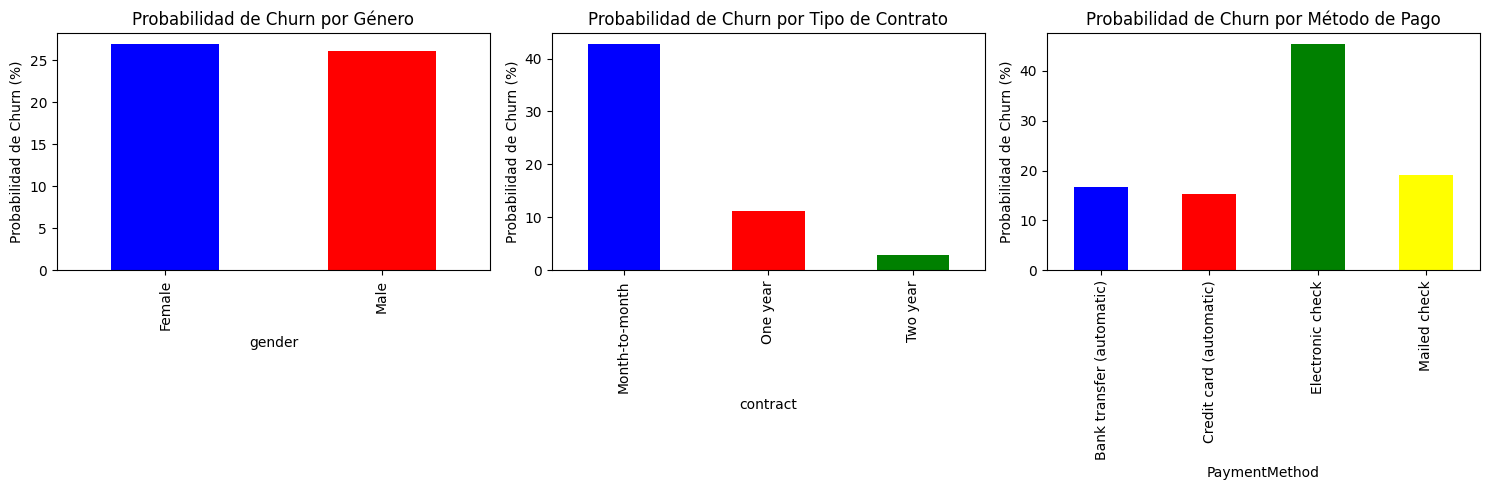

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#por genero:
prob_churn_gender.plot(kind='bar', color=['blue', 'red'], ax=axs[0])
axs[0].set_ylabel('Probabilidad de Churn (%)')
axs[0].set_title('Probabilidad de Churn por Género')

#Tipo de contrato:
prob_churn_contract.plot(kind='bar', color=['blue', 'red', 'green'], ax=axs[1])
axs[1].set_ylabel('Probabilidad de Churn (%)')
axs[1].set_title('Probabilidad de Churn por Tipo de Contrato')

#Metodo de pago
prob_churn_payment.plot(kind='bar', color=['blue', 'red', 'green', 'yellow'], ax=axs[2])
axs[2].set_ylabel('Probabilidad de Churn (%)')
axs[2].set_title('Probabilidad de Churn por Método de Pago')

plt.tight_layout()
plt.show()


In [62]:
df.columns

Index(['Churn', 'customer', 'phone', 'internet', 'account', 'gender',
       'SeniorCitizen', 'Partner', 'tenure', 'Dependents', 'contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'cuentas_diarias'],
      dtype='object')

In [63]:
df.head(1)

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,...,65.6,593.3,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667


In [64]:
df.reset_index(inplace=True)

In [65]:
df.drop('customerID', axis=1, inplace=True)

In [66]:
df.columns

Index(['Churn', 'customer', 'phone', 'internet', 'account', 'gender',
       'SeniorCitizen', 'Partner', 'tenure', 'Dependents', 'contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'cuentas_diarias'],
      dtype='object')

In [67]:
df.head(1)

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
0,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,...,65.6,593.3,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667


In [68]:
df.customer[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   customer          7267 non-null   object 
 2   phone             7267 non-null   object 
 3   internet          7267 non-null   object 
 4   account           7267 non-null   object 
 5   gender            7267 non-null   object 
 6   SeniorCitizen     7267 non-null   int64  
 7   Partner           7267 non-null   int64  
 8   tenure            7267 non-null   int64  
 9   Dependents        7267 non-null   int64  
 10  contract          7267 non-null   object 
 11  PaperlessBilling  7267 non-null   int64  
 12  PaymentMethod     7267 non-null   object 
 13  Monthly           7267 non-null   float64
 14  Total             7256 non-null   float64
 15  InternetService   7267 non-null   object 
 16  OnlineSecurity    7267 non-null   object 


In [70]:
df

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
0,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,...,65.60,593.30,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667
1,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,9,0,...,59.90,542.40,DSL,No,0.0,0.0,0.0,0.0,1.0,1.996667
2,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,4,0,...,73.90,280.85,Fiber optic,No,0.0,1.0,0.0,0.0,0.0,2.463333
3,1.0,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,1,13,0,...,98.00,1237.85,Fiber optic,No,1.0,1.0,0.0,1.0,1.0,3.266667
4,1.0,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,1,3,0,...,83.90,267.40,Fiber optic,No,0.0,0.0,1.0,1.0,0.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,0,13,0,...,55.15,742.90,DSL,Yes,0.0,0.0,1.0,0.0,0.0,1.838333
7263,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,1,22,0,...,85.10,1873.70,Fiber optic,No,0.0,0.0,0.0,0.0,1.0,2.836667
7264,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,2,0,...,50.30,92.75,DSL,No,1.0,0.0,0.0,0.0,0.0,1.676667
7265,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,1,67,1,...,67.85,4627.65,DSL,Yes,0.0,1.0,1.0,0.0,1.0,2.261667


In [71]:
df.phone[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [72]:
df.internet[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [73]:
df.columns

Index(['Churn', 'customer', 'phone', 'internet', 'account', 'gender',
       'SeniorCitizen', 'Partner', 'tenure', 'Dependents', 'contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'cuentas_diarias'],
      dtype='object')

In [74]:
df

,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,tenure,Dependents,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
0,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,...,65.60,593.30,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667
1,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,9,0,...,59.90,542.40,DSL,No,0.0,0.0,0.0,0.0,1.0,1.996667
2,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,4,0,...,73.90,280.85,Fiber optic,No,0.0,1.0,0.0,0.0,0.0,2.463333
3,1.0,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,1,13,0,...,98.00,1237.85,Fiber optic,No,1.0,1.0,0.0,1.0,1.0,3.266667
4,1.0,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,1,3,0,...,83.90,267.40,Fiber optic,No,0.0,0.0,1.0,1.0,0.0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,0,13,0,...,55.15,742.90,DSL,Yes,0.0,0.0,1.0,0.0,0.0,1.838333
7263,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,1,22,0,...,85.10,1873.70,Fiber optic,No,0.0,0.0,0.0,0.0,1.0,2.836667
7264,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,2,0,...,50.30,92.75,DSL,No,1.0,0.0,0.0,0.0,0.0,1.676667
7265,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,1,67,1,...,67.85,4627.65,DSL,Yes,0.0,1.0,1.0,0.0,1.0,2.261667


In [75]:
df.columns

Index(['Churn', 'customer', 'phone', 'internet', 'account', 'gender',
       'SeniorCitizen', 'Partner', 'tenure', 'Dependents', 'contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'cuentas_diarias'],
      dtype='object')

In [76]:
df = df.drop(columns = [ 'account'])


In [77]:
df.head(5)

,Churn,customer,phone,internet,gender,SeniorCitizen,Partner,tenure,Dependents,contract,...,Monthly,Total,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias
0,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,1,9,1,One year,...,65.6,593.30,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667
1,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,0,9,0,Month-to-month,...,59.9,542.40,DSL,No,0.0,0.0,0.0,0.0,1.0,1.996667
2,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,0,4,0,Month-to-month,...,73.9,280.85,Fiber optic,No,0.0,1.0,0.0,0.0,0.0,2.463333
3,1.0,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,1,13,0,Month-to-month,...,98.0,1237.85,Fiber optic,No,1.0,1.0,0.0,1.0,1.0,3.266667
4,1.0,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,1,3,0,Month-to-month,...,83.9,267.40,Fiber optic,No,0.0,0.0,1.0,1.0,0.0,2.796667


In [78]:
datos_telefono = df['phone'].apply(pd.Series)
datos_telefono

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [79]:
df = pd.concat([df, datos_telefono], axis=1)
df

,Churn,customer,phone,internet,gender,SeniorCitizen,Partner,tenure,Dependents,contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias,PhoneService,MultipleLines
0,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,1,9,1,One year,...,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667,Yes,No
1,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,0,9,0,Month-to-month,...,DSL,No,0.0,0.0,0.0,0.0,1.0,1.996667,Yes,Yes
2,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,0,4,0,Month-to-month,...,Fiber optic,No,0.0,1.0,0.0,0.0,0.0,2.463333,Yes,No
3,1.0,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,1,13,0,Month-to-month,...,Fiber optic,No,1.0,1.0,0.0,1.0,1.0,3.266667,Yes,No
4,1.0,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,1,3,0,Month-to-month,...,Fiber optic,No,0.0,0.0,1.0,1.0,0.0,2.796667,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,0,13,0,One year,...,DSL,Yes,0.0,0.0,1.0,0.0,0.0,1.838333,Yes,No
7263,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,1,22,0,Month-to-month,...,Fiber optic,No,0.0,0.0,0.0,0.0,1.0,2.836667,Yes,Yes
7264,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,0,2,0,Month-to-month,...,DSL,No,1.0,0.0,0.0,0.0,0.0,1.676667,Yes,No
7265,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,1,67,1,Two year,...,DSL,Yes,0.0,1.0,1.0,0.0,1.0,2.261667,Yes,No


In [80]:
df.drop(columns= ['phone'], axis=1, inplace=True)

In [81]:
df.columns

Index(['Churn', 'customer', 'internet', 'gender', 'SeniorCitizen', 'Partner',
       'tenure', 'Dependents', 'contract', 'PaperlessBilling', 'PaymentMethod',
       'Monthly', 'Total', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'cuentas_diarias', 'PhoneService', 'MultipleLines'],
      dtype='object')

In [82]:
df.head(1)

,Churn,customer,internet,gender,SeniorCitizen,Partner,tenure,Dependents,contract,PaperlessBilling,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,cuentas_diarias,PhoneService,MultipleLines
0,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,1,9,1,One year,1,...,DSL,No,1.0,0.0,1.0,1.0,0.0,2.186667,Yes,No


In [83]:
df.to_csv('/content/drive/MyDrive/Archivos csv ciencia de datos/Challenge_telecom_X_procesado', index=False)

#Informe

##Introducción.
El proposito de este analisis es ayudar a la empresa Telecom X a encontrar posibles causas para el abandono del servicio por parte de un porcentaje de sus clientes utilizando metodos de depuración de datos por medio de la libreria Pandas de python, con esta sepuración se pretende hacer una purga en los datos para obtener un Data Frame que el equipo de ciencia de datos para una analisis en profundidad. En este proyecto se pretende entender algunas de las causas que han llevado a los clientes a cancelar el servicio de Telecom X.

##Limpieza de los datos.
Para facilidar el acceso continuo a los datos se cargó el archivo .JSON en una carpeta de Google Drive de la cual se extrajo la ruta para poder acceder de forma rapida al data frame, tras esto al verificar que no hubieran inconvenientes para acceder al data frame general se continuó analizando el contenido de las columnas, en las cuales se encontraban diccionarios de datos en los cuales se encontraba información que resultaria util, tal como es la información de cuenta, los datos del cliente y los datos del tipo de servicio con el que cuentan. En seguida la información extraida se concatenó en el data frame principal (df) para poder iniciar con el analisis.
Despues de haber extraido la información necesaria de los diccionarios y de haberlo concatenado se procedió al tratamiento de los datos, esto consistió en alterar los tipos de datos que en la vista de tabla estuvieran como número y en su tipo de dato fueran un objeto/cadena de texto, para esto se utilizó el metodo .astype(np.int64) para poder cambiar el tipo de dato, de igual forma en donde la tabla presentara opciones de si o no se hizo la asignación de valores boleanos, 0 para no, 1 para si.


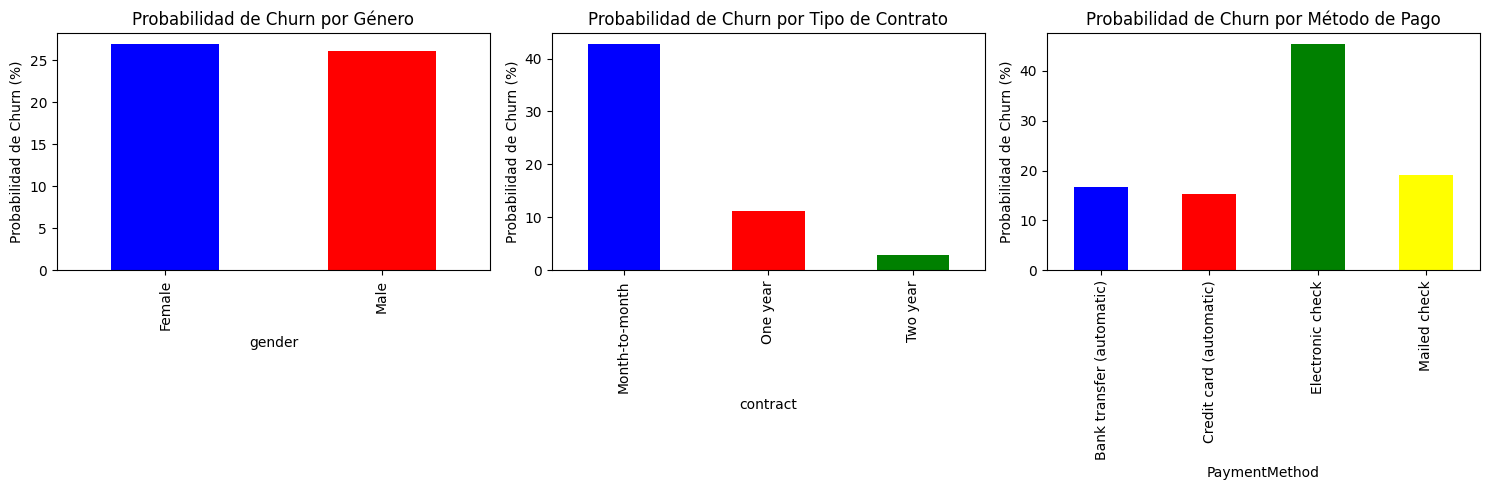

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#por genero:
prob_churn_gender.plot(kind='bar', color=['blue', 'red'], ax=axs[0])
axs[0].set_ylabel('Probabilidad de Churn (%)')
axs[0].set_title('Probabilidad de Churn por Género')

#Tipo de contrato:
prob_churn_contract.plot(kind='bar', color=['blue', 'red', 'green'], ax=axs[1])
axs[1].set_ylabel('Probabilidad de Churn (%)')
axs[1].set_title('Probabilidad de Churn por Tipo de Contrato')

#Metodo de pago
prob_churn_payment.plot(kind='bar', color=['blue', 'red', 'green', 'yellow'], ax=axs[2])
axs[2].set_ylabel('Probabilidad de Churn (%)')
axs[2].set_title('Probabilidad de Churn por Método de Pago')

plt.tight_layout()
plt.show()


##Análisis exploratorio de los datos.

En este apartado se realizó la agrupación de los datos por genero, metodo de pago y tipo de contrato, a continuación apoyandonos de la moda se sacó la proporción de clientes que abandonan el servicio, siendo este un 27% de cancelaciones de los clientes.

###Resultados.
1. los clientes de genero masculino parecen tener una menor tasa de cancelación por lo que se debe estudiar la raiz de la insatisfacción por parte de la clientela femenina para reducir el porcentaje de cancelaciones.
2. Para el tipo de contrato con mas cancelaciones se encuentra el plan mensual, en este caso puede tratarse de un caso en el que el plan mensual sea utilizado como plan de prueba para determinar la permanencia del servicio.
3. en el caso del tipo de pago se encuentra el cheque digital, en este caso la cancelación podria deberse a un factor de preferencia de los clientes con respecto a este meto de pago por parte de sus instituciones bancarias.

##Conclusiones y sugerencias.
###Conclusiones.
aunque la tasa de cancelación del servicio es baja refleja problemas en cuanto a la retencion de los clientes, bajo un supuesto de que los planes anuales o mensuales sean utilizados por los clientes como periodos de prueba, al termino de estos la retencion de los clientes es baja, para este apartado se recomienda modificar la estrategia al momento de recibir la solicitud de cancelacion de servicio, una promocion temporal podria aumentar la tasa de retencion de clientes en los periodos anuales y mensuales.